In [1]:
# Testing Sfera, comparison with engrenage

In [87]:
# load the required python modules
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import time
import random
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline



In [88]:
num_ghosts = 3
# Input parameters for grid and evolution here
N_r = 300 # num points on physical grid
R = 200.0 # Maximum outer radius
r_is_logarithmic = False

# r, initial_state = get_initial_state(R, N_r, r_is_logarithmic)

# for control of time integrator and spatial grid
T = 15 # Maximum evolution time
N_t = 100 # time resolution (only for outputs, not for integration)
# t_res = 50

# Work out dt and time spacing of outputs
dt = T/N_t
t = np.linspace(0, T-dt, N_t)
eta = 2.0 # the 1+log slicing damping coefficient - of order 1/M_adm of spacetime


/var/folders/1g/rr9w26j92c7814lfhsctmwh40000gn/T/ipykernel_1294/2427464889.py:47: RuntimeWarning: invalid value encountered in divide
  ax.plot(t[mask], np.abs(y1-y2)[mask]/np.abs(y1)[mask], 'k-')


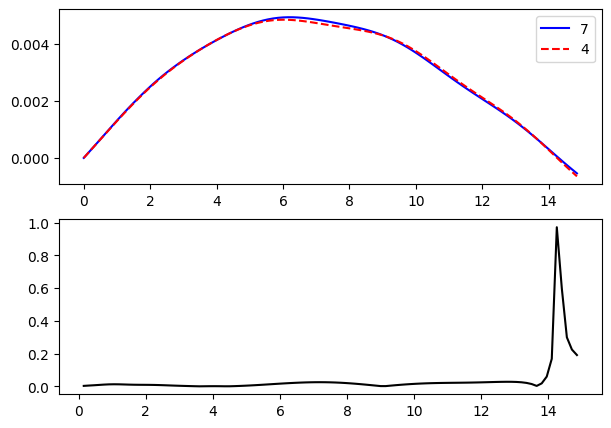

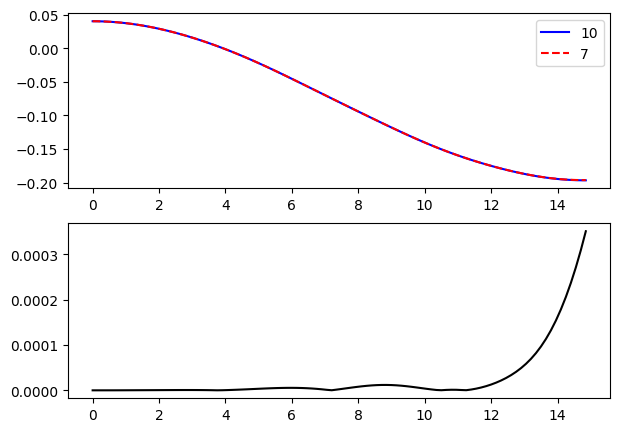

In [89]:
def get_var(var1, solution, idx=num_ghosts+1 +1):
    var1_of_t = solution[0:N_t, var1 * (N_r + 2*num_ghosts) + idx]
    return var1_of_t

ESconv = np.array([11, 13,  0, 1,    2,
                    2,  3,  4, -1, None, 
                    7,  9, 10, 8])

solution_e = np.load('osc_solution_engrenage.npy')
solution_s = np.load('osc_solution_sfera.npy')

mask = (t<30)
# 0,1 = phi/pi
# 2 = chi,  3, 4 = a/b, 
# 6 = K,    7,8 =  Arr/Att
# 13 = lapse

sfera_a = get_var(1, solution_s)
sfera_Aa = get_var(4, solution_s) # *2/3
sfera_Ax = get_var(5, solution_s) # *2/3
r_here = 1.0

var1 = 7   # 7 : Arr
var2 = ESconv[var1]


fig, axs = plt.subplots(2,1, figsize=(7,5))

ax = axs[0]
solution = solution_e
y1 = get_var(var1, solution_e)
ax.plot(t[mask], y1[mask], 'b-', label=var1)

solution = solution_s
y2 = get_var(var2, solution_s)

if var2 == 1 or var2 == 2:
    y2 -=1
if var2 == 5:
    y2 = sfera_Ax *2/3 *r_here**2 * sfera_a
if var2 == 4:
    y2 = sfera_Aa * sfera_a

ax.plot(t[mask], y2[mask], 'r--', label=var2)

ax = axs[1]
ax.plot(t[mask], np.abs(y1-y2)[mask]/np.abs(y1)[mask], 'k-')

# axs[0].set_xscale('log')
# axs[1].set_xscale('log')
# axs[0].set_yscale('log')
# axs[1].set_yscale('log')

axs[0].legend()
plt.show()




############################

var1 = 10   # 3: a   6: K,  10: Lambda
var2 = ESconv[var1]


fig, axs = plt.subplots(2,1, figsize=(7,5))

ax = axs[0]
solution = solution_e
y1 = get_var(var1, solution_e)
ax.plot(t[mask], y1[mask], 'b-', label=var1)

solution = solution_s
y2 = get_var(var2, solution_s)

if var2 == 1 or var2 == 2:
    y2 -=1
if var2 == 5:
    y2 = get_var(5, solution_s) * sfera_a *2/3

ax.plot(t[mask], y2[mask], 'r--', label=var2)

ax = axs[1]
ax.plot(t[mask], np.abs(y1-y2)[mask], 'k-')

# axs[0].set_xscale('log')
# axs[1].set_xscale('log')
# axs[0].set_yscale('log')
# axs[1].set_yscale('log')
axs[0].legend()
plt.show()



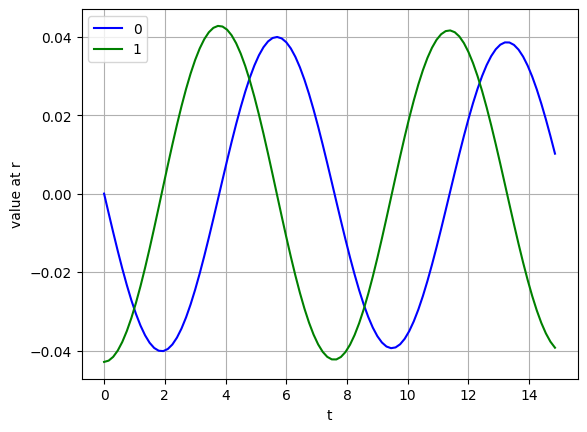

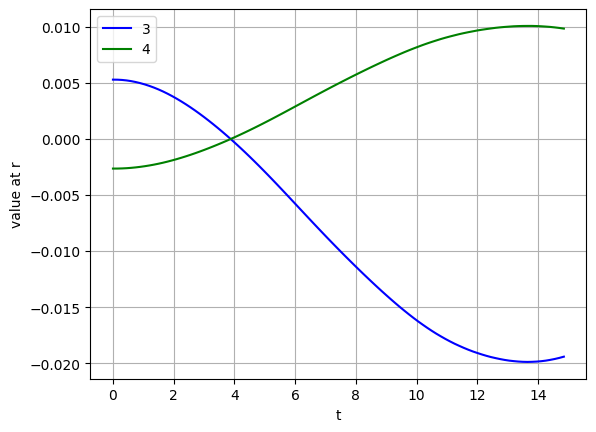

In [90]:
# engrenage
solution = np.load('osc_solution_engrenage.npy')

# Plot a single point versus time
var1 = 0
var2 = 1

idx = num_ghosts+1
# r_i = np.round(r[idx],2)
var1_of_t = solution[0:N_t, var1 * (N_r + 2*num_ghosts) + idx]
plt.plot(t,  var1_of_t, 'b-', label=var1)
var2_of_t = solution[0:N_t, var2 * (N_r + 2*num_ghosts) + idx]
plt.plot(t, var2_of_t, 'g-', label=var2)
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('value at r' )
plt.legend(loc='best')
plt.grid()

plt.show()


# Plot a single point versus time
var1 = 3
var2 = 4

idx = num_ghosts+1
# r_i = np.round(r[idx],2)
var1_of_t = solution[0:N_t, var1 * (N_r + 2*num_ghosts) + idx]
plt.plot(t,  var1_of_t, 'b-', label=var1)
var2_of_t = solution[0:N_t, var2 * (N_r + 2*num_ghosts) + idx]
plt.plot(t, var2_of_t, 'g-', label=var2)
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('value at r' )
plt.legend(loc='best')
plt.grid()

plt.show()

In [111]:
different_params = True

if different_params:
    num_ghosts = 3
    # Input parameters for grid and evolution here
    N_r = 400 # num points on physical grid
    R = 200.0 # Maximum outer radius
    r_is_logarithmic = False

    # r, initial_state = get_initial_state(R, N_r, r_is_logarithmic)

    # for control of time integrator and spatial grid
    T = 20.0 # Maximum evolution time
    N_t = 100 # time resolution (only for outputs, not for integration)
    # t_res = 50

    # Work out dt and time spacing of outputs
    dt = T/N_t
    t = np.linspace(0, T-dt, N_t)
    eta = 2.0 # the 1+log slicing damping coefficient - of order 1/M_adm of spacetime


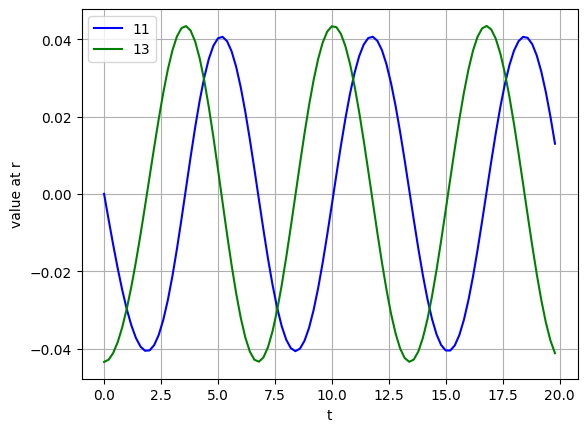

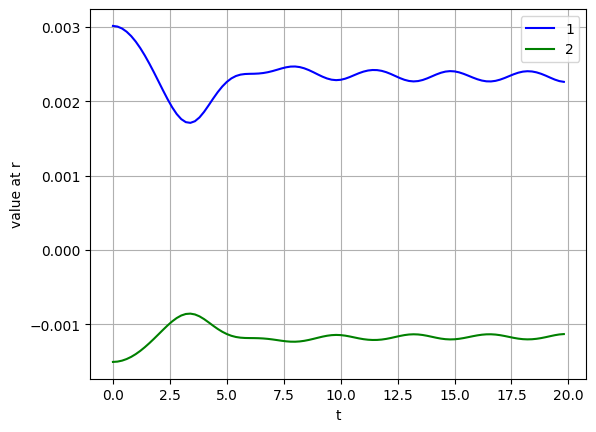

In [114]:
# engrenage
solution = np.load('osc_solution_sfera.npy')

# Plot a single point versus time
var1 = 11
var2 = 13

idx = num_ghosts+1
# r_i = np.round(r[idx],2)
var1_of_t = solution[0:N_t, var1 * (N_r + 2*num_ghosts) + idx]
plt.plot(t, var1_of_t, 'b-', label=var1)
var2_of_t = solution[0:N_t, var2 * (N_r + 2*num_ghosts) + idx]
plt.plot(t, var2_of_t, 'g-', label=var2)
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('value at r' )
plt.legend(loc='best')
plt.grid()

plt.show()


var1 = 1
var2 = 2



var1_of_t = solution[0:N_t, var1 * (N_r + 2*num_ghosts) + idx] -1
plt.plot(t, var1_of_t, 'b-', label=var1)
var2_of_t = solution[0:N_t, var2 * (N_r + 2*num_ghosts) + idx] -1
plt.plot(t, var2_of_t, 'g-', label=var2)
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('value at r' )
plt.legend(loc='best')
plt.grid()

plt.show()

In [115]:
"""



Extra


"""

'\n\n\n\nExtra\n\n\n'

In [40]:
# # plot the profile for some variable at a selection of times
# var = idx_u # I suggest looking at the field u, or the lapse to see the gauge evolution

# for i, t_i in enumerate(t) :
#     if (i < N_t) and (i % 4 == 0) and (t_i > 0.0):
#         labelt = "t="+str(round(t_i,2))
#         f_t = solution[i, var * (N_r + 2*num_ghosts): (var + 1) * (N_r + 2*num_ghosts)]
#         plt.plot(r, f_t, label=labelt)

# plt.legend(loc=4)
# plt.xlabel('r')
# plt.xlim(-0.2,35.0)
# plt.ylabel('value over time of ' + variable_names[var])
# plt.grid()

In [41]:
# calculate the diagnostics, just the Hamiltonian constraint for 

# r, Ham = get_Ham_diagnostic(solution, t, R, N_r, r_is_logarithmic)